# Case study

A dataset containing churn data of a bank. The task is to use the data from the dataset to answer a set of questions.


# Dataset
The dataset contains the following columns:
- customer_id: the account number
- credit_score: the credit score of the customer
- country: the country of residence
- gender
- age
- tenure: how long the customer has had the bank account
- balance: account balance
- product_number: the number of products from the bank
- credit_card: does the customer have a credit card?
- active_member: Is the customer active?
- estimated_salary: the estimated salary of the customer
- chrun: has the client left the bank?

# Questions:
- Data exploration: How would you visualize the data for further exploration?

- How would you describe the "best" customers of the bank?
- On which customers should the bank focus on with regards to churn? Which customers are less critical?

- Which age category is more likely to churn?
- From which country are the churners most likely to be?
- Is there a relationship between the churn an the income?
- Are customers with a high credit score more likely to churn?

- What are the most influential factors on the churn?

- Try to predict the churn according to the given data. Use two different methods and compare them.

- What are possible strategies for the bank to avoid churn?


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as mtick
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_auc_score, roc_curve, recall_score
from sklearn.model_selection import (train_test_split, GridSearchCV, RandomizedSearchCV)

In [ ]:
# Upload data file in the drive
from google.colab import files
uploaded = files.upload()

Saving bank_customer_churn_dataset.csv to bank_customer_churn_dataset.csv


In [ ]:
# Store dataset in a Pandas Dataframe
df = pd.read_csv(io.BytesIO(uploaded['bank_customer_churn_dataset.csv']))


In [ ]:
# Descriptive statistics of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
# Descriptive statistics
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# Check any missing value
df.isna().any()

customer_id         False
credit_score        False
country             False
gender              False
age                 False
tenure              False
balance             False
products_number     False
credit_card         False
active_member       False
estimated_salary    False
churn               False
dtype: bool

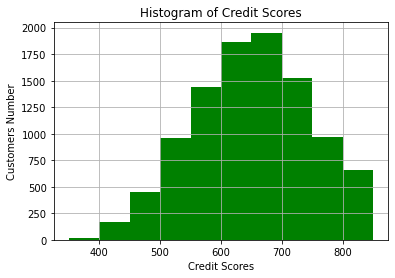

In [ ]:
plt.hist(df.credit_score, facecolor='g')
plt.xlabel('Credit Scores')
plt.ylabel('Customers Number')
plt.title('Histogram of Credit Scores')
plt.grid(True)

The "best" customers mean who's credit score is highest, that is according to the definition of credit score, higher credit score is the best, which depends on credit behavior, such as how likely they are to pay a loan back on time.

In [ ]:
# Find highest credit_score customers
best_customers = df[(df['credit_score'] == max(df.credit_score))]
print(max(df.credit_score))

850


In [ ]:
best_customers['customer_id']

4       15737888
38      15717426
180     15716334
200     15604482
223     15733247
          ...   
9581    15709256
9646    15603111
9688    15730579
9931    15647800
9949    15798615
Name: customer_id, Length: 233, dtype: int64

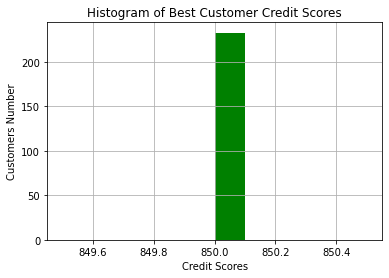

In [ ]:
plt.hist(best_customers.credit_score, facecolor='g')
plt.xlabel('Credit Scores')
plt.ylabel('Customers Number')
plt.title('Histogram of Best Customer Credit Scores')
plt.grid(True)

In [ ]:
# Define a function for histrogram
def hist(feature):
    group_df = df.groupby([feature, 'churn']).size().reset_index()
    group_df = group_df.rename(columns = {0: 'Count'})
    group_df['churn'] = group_df['churn'].map({0 : 'No', 1: 'Yes'})
    fig = px.histogram(group_df, x = feature, y = 'Count', color = 'churn', 
                       marginal = 'box', 
                       title = f'Churn frequency to {feature} distribution', 
                       color_discrete_sequence = ["blue", "pink"])
    print(group_df)
    fig.show()

In [ ]:
hist('credit_score')

     credit_score churn  Count
0             350   Yes      5
1             351   Yes      1
2             358   Yes      1
3             359   Yes      1
4             363   Yes      1
..            ...   ...    ...
857           848    No      5
858           849    No      6
859           849   Yes      2
860           850    No    190
861           850   Yes     43

[862 rows x 3 columns]


In [ ]:
hist('age')

     age churn  Count
0     18    No     20
1     18   Yes      2
2     19    No     26
3     19   Yes      1
4     20    No     38
..   ...   ...    ...
123   84    No      1
124   84   Yes      1
125   85    No      1
126   88    No      1
127   92    No      2

[128 rows x 3 columns]


The context of comparison is different depending on separate variables. age group (40-49) is more critical as well as credit score 600 to 700.

In [ ]:
hist('age')

     age churn  Count
0     18    No     20
1     18   Yes      2
2     19    No     26
3     19   Yes      1
4     20    No     38
..   ...   ...    ...
123   84    No      1
124   84   Yes      1
125   85    No      1
126   88    No      1
127   92    No      2

[128 rows x 3 columns]


From the above plot, we can see that age group (40-49) is more likely to churn.

In [ ]:
# Frequency of Churn
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [ ]:
# Define Pie diagram function
def pie(parameter):
    class_names = ['No','Yes']
    target_instance = df[parameter].value_counts().to_frame()
    target_instance = target_instance.reset_index()
    target_instance = target_instance.rename(columns = {'index': 'Category'})
    fig = px.pie(target_instance, values = parameter, names = ('No','Yes'), 
                 color_discrete_sequence=["blue", "pink"], 
                 title = f'Distribution of {parameter}')
    fig.show()

In [ ]:
pie('churn')

In [ ]:
hist('country')

   country churn  Count
0   France    No   4204
1   France   Yes    810
2  Germany    No   1695
3  Germany   Yes    814
4    Spain    No   2064
5    Spain   Yes    413


According to the above histrogram, Germany is the country from which the churners most likely to be.

In [ ]:
# Define a function to calculate relationship
def relationship(variable):
    correlations = df.corrwith(variable)
    correlations = correlations[correlations != 1]
    positive_correlations = correlations[correlations > 0].sort_values(ascending = False)
    negative_correlations = correlations[correlations < 0].sort_values(ascending = False)
    print('Most Positive Correlations:', positive_correlations)
    print('Most Negative Correlations:', negative_correlations)


    correlations.plot.bar(figsize = (14, 6), fontsize = 15, 
                      color = 'orange', rot = 45, grid = True)
    plt.title('Correlation with Churn', horizontalalignment = "center", 
          fontstyle = "normal", fontsize = "14", fontfamily = "sans-serif")

Most Positive Correlations: age                 0.285323
balance             0.118533
estimated_salary    0.012097
dtype: float64
Most Negative Correlations: customer_id       -0.006248
credit_card       -0.007138
tenure            -0.014001
credit_score      -0.027094
products_number   -0.047820
active_member     -0.156128
dtype: float64


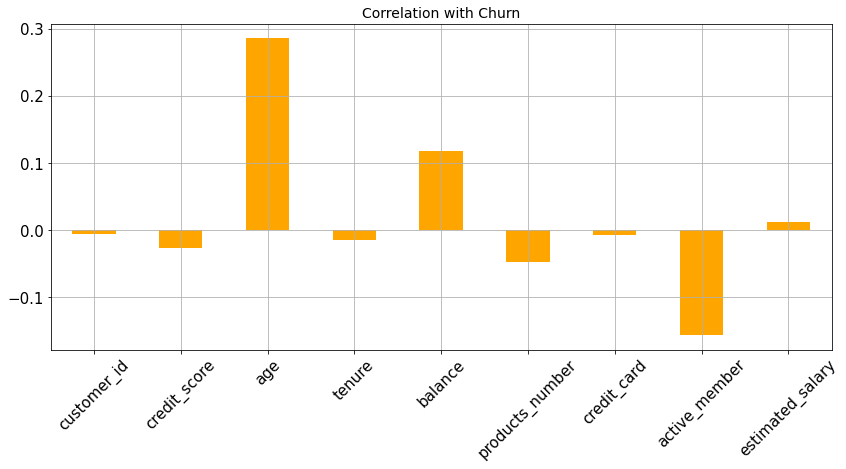

In [ ]:
relationship(df.churn)

From the correlation plot, we can easily conclude, that there have positive relationship between churn and income.

In [ ]:
hist('credit_score')

     credit_score churn  Count
0             350   Yes      5
1             351   Yes      1
2             358   Yes      1
3             359   Yes      1
4             363   Yes      1
..            ...   ...    ...
857           848    No      5
858           849    No      6
859           849   Yes      2
860           850    No    190
861           850   Yes     43

[862 rows x 3 columns]


In [ ]:
def bar(feature, df = df):
    # Groupby the categorical feature
    temp_df = df.groupby([feature, 'churn']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'Count'})
    # Calculate the value counts of each distribution and it's corresponding Percentages
    value_counts_df = df[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
    # Calculate the value counts of each distribution and it's corresponding Percentages
    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    div_list = [element / sum(num_list) for element in num_list]
    percentage = [round(element * 100, 1) for element in div_list]
    # Define string formatting for graph annotation
    # Numeric section
    def num_format(list_instance):
        formatted_str = ''
        for index,num in enumerate(list_instance):
            if index < len(list_instance) - 2:
                formatted_str = formatted_str+f'{num}%, ' #append to empty string(formatted_str)
            elif index == len(list_instance) - 2:
                formatted_str = formatted_str+f'{num}% & '
            else:
                formatted_str = formatted_str+f'{num}%'
        return formatted_str
    #Categorical section
    def str_format(list_instance):
        formatted_str = ''
        for index, cat in enumerate(list_instance):
            if index < len(list_instance) - 2:
                formatted_str = formatted_str+f'{cat}, '
            elif index == len(list_instance) - 2:
                formatted_str = formatted_str+f'{cat} & '
            else:
                formatted_str = formatted_str+f'{cat}'
        return formatted_str
    # Running the formatting functions
    num_str = num_format(percentage)
    cat_str = str_format(categories)
    # Setting graph framework
    fig = px.bar(temp_df, x = feature, y = 'Count', color = 'churn', title = f'Churn rate by {feature}', 
                 barmode = "group", color_discrete_sequence = ["pink","red"])
    fig.add_annotation(
                text = f'Value count of distribution of {cat_str} are<br>{num_str} percentage respectively.',
                align = 'left',
                showarrow = False,
                xref = 'paper',
                yref = 'paper',
                x = 1.1,
                y = 1.1,
                bordercolor = 'black',
                borderwidth = 0.5)
    #fig.update_layout(
    #    # Margin space for the annotations on the right
    #    margin = dict(r = 700),
    #)
     
    return fig.show() 

In [ ]:
bar('credit_score')

In [ ]:
bar('gender')

In [ ]:
# Calculating churn percentages
churn_rate = df[["churn", "customer_id"]]
churn_rate["churn_label"] = pd.Series(np.where((churn_rate["churn"] == 0), "No", "Yes"))
sectors = churn_rate.groupby("churn_label")
churn_rate = pd.DataFrame(sectors["customer_id"].count())
churn_rate["Churn Rate"] = (churn_rate["customer_id"]/ sum(churn_rate["customer_id"]))*100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
churn_rate

,customer_id,Churn Rate
churn_label,,
No,7963,79.63
Yes,2037,20.37


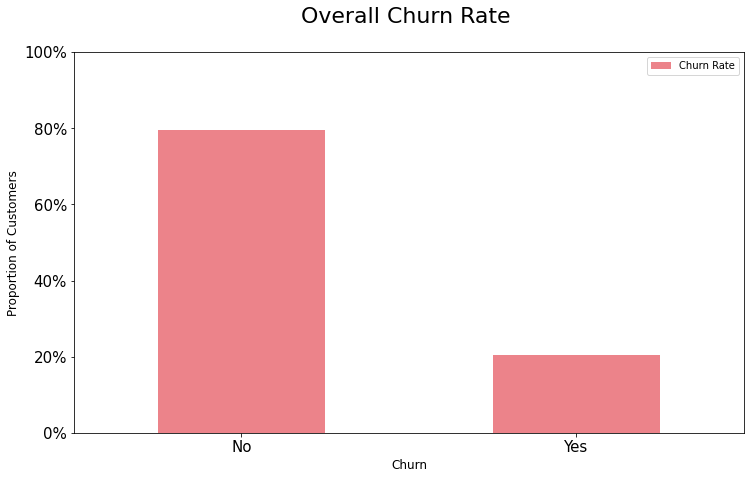

In [ ]:
ax = churn_rate[["Churn Rate"]].plot.bar(title = 'Overall Churn Rate', 
                                         legend = True, table = False, 
                                         grid = False, subplots = False, 
                                         figsize =(12, 7), color = '#ec838a', 
                                         fontsize = 15, stacked = False, ylim =(0,100))
plt.ylabel('Proportion of Customers', horizontalalignment = "center", 
           fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Churn', horizontalalignment = "center", fontstyle = "normal", 
           fontsize = "large", fontfamily = "sans-serif")
plt.title('Overall Churn Rate \n', horizontalalignment = "center", 
          fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc = 'upper right', fontsize = "medium")
plt.xticks(rotation = 0, horizontalalignment = "center")
plt.yticks(rotation=0, horizontalalignment = "right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
x_labels = np.array(churn_rate[["customer_id"]])

From the above distribution plot, we can conclude that highest credit score is more likely to churn.

In [ ]:
### What are the most influential factors on the churn?

Most Positive Correlations: age                 0.285323
balance             0.118533
estimated_salary    0.012097
dtype: float64
Most Negative Correlations: customer_id       -0.006248
credit_card       -0.007138
tenure            -0.014001
credit_score      -0.027094
products_number   -0.047820
active_member     -0.156128
dtype: float64


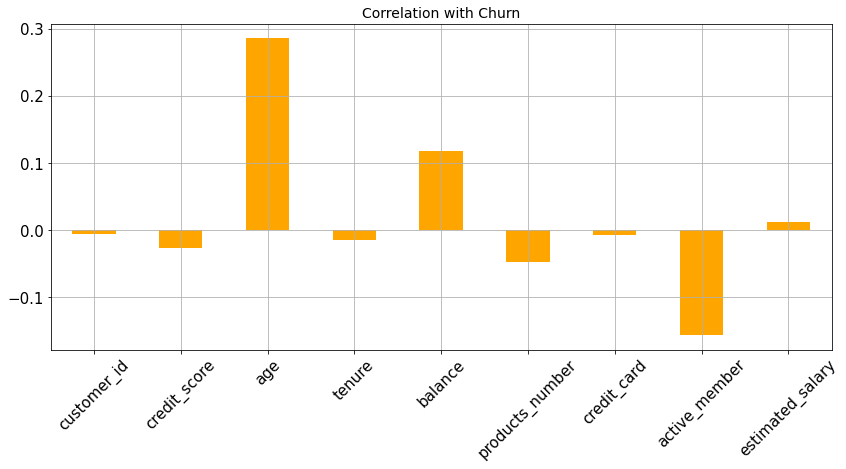

In [ ]:
relationship(df.churn)

In [ ]:
# Correlation between variables
corr = df.corr()
fig = px.imshow(corr, width = 600, height = 600)
fig.show()

The most influencial factors on the churn are age, balance and estimated_salary.

In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df_c = df
df_c['country'] = df_c['country'].map({'France' : 0, 'Germany' : 1, 'Spain' : 2})
df_c['gender'] = df_c['gender'].map({'Male' : 0, 'Female' : 1})

In [ ]:
# Prepared data for predictive model
Y = df['churn']
# Get categorical dataframe
cat_data_churn = df[["country", "gender", "credit_card", "active_member"]]
X = df.drop(labels = ["churn", "country", "gender", "credit_card", "active_member"], axis = 1)
# Get labels for modelling
cols = X.columns
indx = X.index

In [ ]:
# Transform dataset then concat
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = indx)
X = pd.concat([X, cat_data_churn], axis = 1)
print(X.shape, Y.shape)

(10000, 11) (10000,)


In [ ]:
print(X)

      customer_id  credit_score       age  tenure   balance  products_number  \
0       -0.450149     -0.246269  0.416667   -0.75 -0.761480              0.0   
1       -0.348236     -0.328358  0.333333   -1.00 -0.104906              0.0   
2       -0.572822     -1.119403  0.416667    0.75  0.489346              2.0   
3        0.085129      0.350746  0.166667   -1.00 -0.761480              1.0   
4        0.378091      1.477612  0.500000   -0.75  0.221806              0.0   
...           ...           ...       ...     ...       ...              ...   
9995    -0.677669      0.888060  0.166667    0.00 -0.761480              1.0   
9996    -0.969051     -1.014925 -0.166667    1.25 -0.312031              0.0   
9997    -0.851654      0.425373 -0.083333    0.50 -0.761480              0.0   
9998    -0.067222      0.895522  0.416667   -0.50 -0.173319              1.0   
9999    -0.500531      1.044776 -0.750000   -0.25  0.258094              0.0   

      estimated_salary  country  gender

In [ ]:
# Devide training and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 40)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
train_identity = X_train['customer_id']
X_train = X_train.drop(columns = ['customer_id'])
test_identity = X_test['customer_id']
X_test = X_test.drop(columns = ['customer_id'])

(8000, 11) (2000, 11) (8000,) (2000,)


In [ ]:
# KNeighbors Classifier
knn = KNeighborsClassifier()
# Set hyperparameter grid for tuning
knn_param_grid = {'n_neighbors' : np.arange(5, 26),
                  'weights' : ['uniform', 'distance']}
# Tune hyperparameters
knn_cv = GridSearchCV(knn, param_grid = knn_param_grid, cv = 5)
# Fit knn to training data
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25]),
                         'weights': ['uniform', 'distance']})

In [ ]:
# Get best hyperparameters
print("Tuned KNN Parameters: {}".format(knn_cv.best_params_))
print("Best KNN Training Score:{}".format(knn_cv.best_score_))

# Predict knn on test data
print("KNN Test Performance: {}".format(knn_cv.score(X_test, Y_test)))
# Obtain model performance metrics
knn_pred_prob = knn_cv.predict_proba(X_test)[:, 1]
knn_auroc = roc_auc_score(Y_test, knn_pred_prob)
print("KNN AUROC: {}".format(knn_auroc))
knn_y_pred = knn_cv.predict(X_test)
print(classification_report(Y_test, knn_y_pred))

Tuned KNN Parameters: {'n_neighbors': 10, 'weights': 'distance'}
Best KNN Training Score:0.8404999999999999
KNN Test Performance: 0.842
KNN AUROC: 0.8154578885622937
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1616
           1       0.65      0.39      0.49       384

    accuracy                           0.84      2000
   macro avg       0.76      0.67      0.70      2000
weighted avg       0.83      0.84      0.83      2000



In [ ]:
### Logistic Regression

In [ ]:
#  Classifier instantiation
lr = LogisticRegression(random_state = 30)
# tune by setting up hyperparameter grid
lr_param_grid = {'C' : [0.0001, 0.001, 0.01, 0.05, 0.1] }
# Tune hyperparamters
lr_cv = GridSearchCV(lr, param_grid = lr_param_grid, cv = 5)
# Fit lr to training data
lr_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=30),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.05, 0.1]})

In [ ]:
# Find best hyperparameters
print("Tuned LR Parameters: {}".format(lr_cv.best_params_))
print("Best LR Training Score:{}".format(lr_cv.best_score_))

Tuned LR Parameters: {'C': 0.1}
Best LR Training Score:0.80475


In [ ]:
# Predict lr on test data
print("LR Test Performance: {}".format(lr_cv.score(X_test, Y_test)))
# model performance metrics
lr_pred_prob = lr_cv.predict_proba(X_test)[:,1]
lr_auroc = roc_auc_score(Y_test, lr_pred_prob)
print("LR AUROC: {}".format(lr_auroc))
lr_y_pred = lr_cv.predict(X_test)
print(classification_report(Y_test, lr_y_pred))

LR Test Performance: 0.8185
LR AUROC: 0.7684338258044554
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1616
           1       0.59      0.18      0.28       384

    accuracy                           0.82      2000
   macro avg       0.71      0.57      0.59      2000
weighted avg       0.79      0.82      0.78      2000



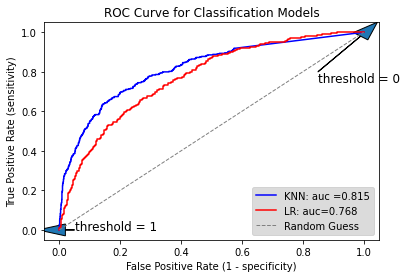

In [ ]:
# Compare model
knn_fpr, knn_tpr, knn_thresh = roc_curve(Y_test, knn_pred_prob)
plt.plot(knn_fpr,knn_tpr,label = "KNN: auc ="+str(round(knn_auroc, 3)),
         color = 'blue')
lr_fpr, lr_tpr, lr_thresh = roc_curve(Y_test, lr_pred_prob)
plt.plot(lr_fpr, lr_tpr,label = "LR: auc="+str(round(lr_auroc, 3)),
         color = 'red')

plt.plot([0, 1], [0, 1], color = 'gray', lw = 1, linestyle = '--', 
         label = 'Random Guess')

plt.legend(loc = 'best', frameon = True, facecolor = 'lightgray')
plt.title('ROC Curve for Classification Models')
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.text(0.85, 0.75, 'threshold = 0', fontsize = 12)
plt.arrow(0.85, 0.8, 0.14, 0.18, head_width = 0.06)
plt.text(0.05, 0, 'threshold = 1', fontsize = 12)
plt.arrow(0.05, 0, -0.03, 0, head_width = 0.06)
plt.savefig('Plot-ROC_4models.png', dpi = 1200)
plt.show()

From the above ROC curve, it can be concluded, that KNN have performed better comparing with Logistic Regression.

In [ ]:
# Depending on correlation, need to do further analysis on age, balance and income.
# Need to focus more in the age group.
# Need to take more care for the customer who have less or highest credit score.